### CSI
- The Characteristic Stability Index (CSI) is a metric used to evaluate the stability or drift of individual features in a dataset. It's similar to the Population Stability Index (PSI) but applied to each feature separately. Here's an example of how to calculate and use CSI in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def calculate_csi(reference, monitored, bins=10):
    all_data = np.concatenate([reference, monitored])
    bin_edges = np.histogram_bin_edges(all_data, bins=bins)
    
    hist_reference, _ = np.histogram(reference, bins=bin_edges)
    hist_monitored, _ = np.histogram(monitored, bins=bin_edges)
    
    pct_reference = hist_reference / len(reference)
    pct_monitored = hist_monitored / len(monitored)
    
    # Avoid division by zero and log of zero
    pct_reference = np.where(pct_reference == 0, 0.0001, pct_reference)
    pct_monitored = np.where(pct_monitored == 0, 0.0001, pct_monitored)
    
    csi = np.sum((pct_monitored - pct_reference) * np.log(pct_monitored / pct_reference))
    
    return csi


### Create sample data

In [3]:
np.random.seed(42)

# Reference dataset
n_samples = 1000
n_features = 5

reference_data = pd.DataFrame({
    'feature_1': np.random.normal(0, 1, n_samples),
    'feature_2': np.random.exponential(2, n_samples),
    'feature_3': np.random.uniform(-1, 1, n_samples),
    'feature_4': np.random.poisson(3, n_samples),
    'feature_5': np.random.normal(5, 2, n_samples)
})

# Monitored dataset (with some changes)
monitored_data = pd.DataFrame({
    'feature_1': np.random.normal(0.2, 1.1, n_samples),  # Slight shift
    'feature_2': np.random.exponential(2.5, n_samples),  # Increased rate
    'feature_3': np.random.uniform(-1.5, 1.5, n_samples),  # Wider range
    'feature_4': np.random.poisson(3, n_samples),  # No change
    'feature_5': np.random.normal(5, 2, n_samples)  # No change
})


### Calculate the CSI for each feature

In [4]:
csi_values = {}

for feature in reference_data.columns:
    csi = calculate_csi(reference_data[feature], monitored_data[feature])
    csi_values[feature] = csi

# Display CSI values
for feature, csi in csi_values.items():
    print(f"{feature}: CSI = {csi:.4f}")


feature_1: CSI = 0.0828
feature_2: CSI = 0.0521
feature_3: CSI = 1.5456
feature_4: CSI = 0.0488
feature_5: CSI = 0.0160


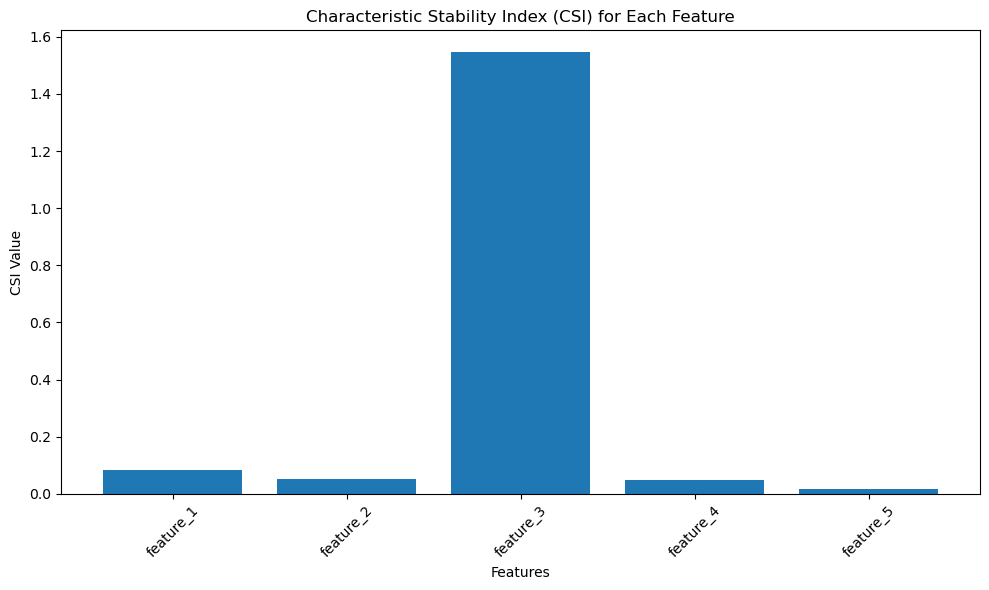

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(csi_values.keys(), csi_values.values())
plt.title('Characteristic Stability Index (CSI) for Each Feature')
plt.xlabel('Features')
plt.ylabel('CSI Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
